In [6]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'TRUE' 
import tensorflow as tf
from keras.layers import Input, Lambda, Dense
from keras.models import Model
from keras.applications.resnet import ResNet50
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from glob import glob
import PIL

In [7]:
import pathlib

# data_dir has the path of my directory of the images
data_dir = pathlib.Path(os.getcwd()).joinpath("Dataset/training")

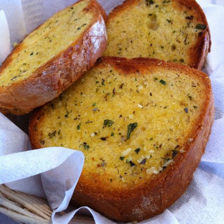

In [94]:
# A image of Bread Class
food_path = list(glob('Dataset/training/Bread/*'))
PIL.Image.open(str(food_path[0])).resize((224, 224))

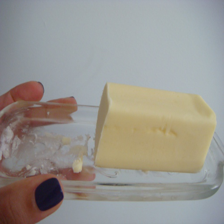

In [93]:
# A image of Dairy product Class
food_path = list(glob('Dataset/training/Dairy product/*'))
PIL.Image.open(str(food_path[2])).resize((224, 224))

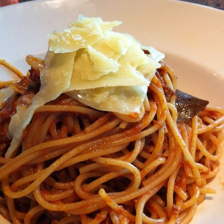

In [92]:
# A image of Noodles-Pasta Class
food_path = list(glob('Dataset/training/Noodles-Pasta/*'))
PIL.Image.open(str(food_path[3])).resize((224, 224))

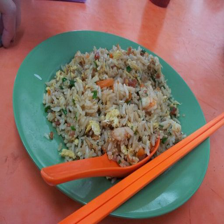

In [91]:
# A image of Rice Class
food_path = list(glob('Dataset/training/Rice/*'))
PIL.Image.open(str(food_path[4])).resize((224, 224))

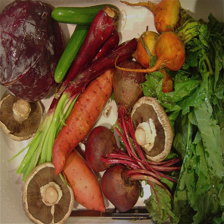

In [96]:
# A image of Vegetable-Fruit Class
food_path = list(glob('Dataset/training/Vegetable-Fruit/*'))
PIL.Image.open(str(food_path[0])).resize((224, 224))

### **Data Preprocessing:** Resize images, normalize pixel values, and split data into training and testing sets.

In [9]:
img_height, img_width = 224, 224
batch_size = 32

# Train DataSet
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = "training",
    seed =  123,
    label_mode = 'categorical',
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 2852 files belonging to 5 classes.
Using 2282 files for training.


In [10]:
# Validation Dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = "validation",
    seed =  123,
    label_mode = 'categorical',
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 2852 files belonging to 5 classes.
Using 570 files for validation.


In [11]:
class_name = train_ds.class_names
print(f'The Classes are : {class_name}')

The Classes are : ['Bread', 'Dairy product', 'Noodles-Pasta', 'Rice', 'Vegetable-Fruit']


### **Model Architecture:** Choose a Convolutional Neural Network (CNN) architecture like VGG, ResNet, or MobileNet.

In [12]:
resnet_model = Sequential()

pretrained_model = ResNet50(include_top = False,
                            input_shape = (224, 224, 3),
                            pooling = 'avg',
                            classes = 5,
                            weights = 'imagenet')

for layer in pretrained_model.layers:
    layer.trainable = False

resnet_model.add(pretrained_model)
resnet_model.add(tf.keras.layers.Flatten())
resnet_model.add(Dense(64, activation = 'relu'))
resnet_model.add(Dense(5, activation = 'softmax'))

In [13]:
resnet_model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

### **Model Training:** Train the model on the preprocessed dataset.

In [14]:
r = resnet_model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 5 
)

Epoch 1/5
72/72 [==============================] - 287s 4s/step - loss: 0.4293 - accuracy: 0.8330 - val_loss: 0.2726 - val_accuracy: 0.9000
Epoch 2/5
72/72 [==============================] - 590s 8s/step - loss: 0.1404 - accuracy: 0.9527 - val_loss: 0.2448 - val_accuracy: 0.9211
Epoch 3/5
72/72 [==============================] - 337s 5s/step - loss: 0.0850 - accuracy: 0.9711 - val_loss: 0.1890 - val_accuracy: 0.9439
Epoch 4/5
72/72 [==============================] - 380s 5s/step - loss: 0.0433 - accuracy: 0.9912 - val_loss: 0.1767 - val_accuracy: 0.9456
Epoch 5/5
72/72 [==============================] - 468s 6s/step - loss: 0.0257 - accuracy: 0.9952 - val_loss: 0.1815 - val_accuracy: 0.9439


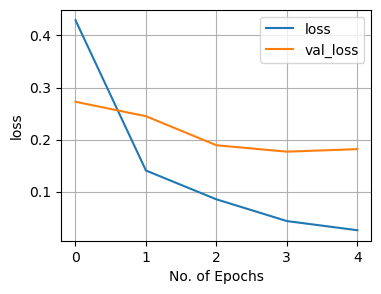

In [15]:
plt.figure(figsize= (4,3))

plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.grid()
plt.xlabel('No. of Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

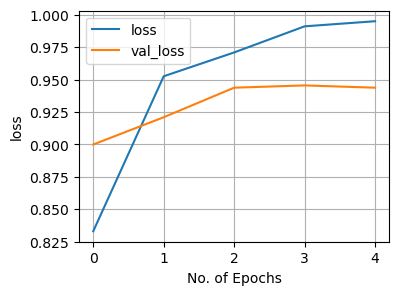

In [16]:
plt.figure(figsize= (4,3))

plt.plot(r.history['accuracy'], label = 'loss')
plt.plot(r.history['val_accuracy'], label = 'val_loss')
plt.grid()
plt.xlabel('No. of Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

### **Model Evaluation:** Evaluate the model's accuracy and other relevant metrics on the test dataset.

In [17]:
# test_data_dir has the path test images
test_data_dir = pathlib.Path(os.getcwd()).joinpath("Dataset/evaluation")

In [18]:
# Validation Dataset
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_data_dir,
    seed =  123,
    label_mode = 'categorical',
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 959 files belonging to 5 classes.


In [19]:
test_loss, test_acc = resnet_model.evaluate(test_ds)
print(f"Test Accuracy: {test_acc : .2f}")

30/30 [==============================] - 95s 3s/step - loss: 0.1515 - accuracy: 0.9479
Test Accuracy:  0.95


### **Visualization:** Visualize model predictions and explore misclassified images.

In [20]:
# Make predictions on test data
predictions = resnet_model.predict(test_ds)

30/30 [==============================] - 326s 11s/step


In [54]:
y_pred = []

for i in predictions:
    class_id = np.argmax(i, axis = 0)
    y_pred.append(class_name[class_id.item()])

print(y_pred)

['Bread', 'Bread', 'Bread', 'Bread', 'Vegetable-Fruit', 'Vegetable-Fruit', 'Dairy product', 'Bread', 'Noodles-Pasta', 'Noodles-Pasta', 'Bread', 'Bread', 'Bread', 'Vegetable-Fruit', 'Dairy product', 'Vegetable-Fruit', 'Bread', 'Dairy product', 'Bread', 'Noodles-Pasta', 'Bread', 'Rice', 'Rice', 'Vegetable-Fruit', 'Dairy product', 'Noodles-Pasta', 'Vegetable-Fruit', 'Bread', 'Bread', 'Noodles-Pasta', 'Vegetable-Fruit', 'Vegetable-Fruit', 'Bread', 'Bread', 'Noodles-Pasta', 'Rice', 'Vegetable-Fruit', 'Bread', 'Bread', 'Vegetable-Fruit', 'Noodles-Pasta', 'Bread', 'Noodles-Pasta', 'Rice', 'Rice', 'Dairy product', 'Bread', 'Dairy product', 'Rice', 'Dairy product', 'Dairy product', 'Bread', 'Vegetable-Fruit', 'Rice', 'Vegetable-Fruit', 'Noodles-Pasta', 'Dairy product', 'Bread', 'Dairy product', 'Bread', 'Vegetable-Fruit', 'Bread', 'Bread', 'Vegetable-Fruit', 'Vegetable-Fruit', 'Vegetable-Fruit', 'Bread', 'Bread', 'Noodles-Pasta', 'Bread', 'Bread', 'Rice', 'Dairy product', 'Dairy product', 'Vege

In [71]:
# creating list of true lable

directory_path = 'Dataset/evaluation/Bread/'
elements = os.listdir(directory_path)
list1 = ['Bread'] * len(elements)

directory_path = 'Dataset/evaluation/Dairy product/'
elements = os.listdir(directory_path)
list2 = ['Dairy product'] * len(elements)

directory_path = 'Dataset/evaluation/Noodles-Pasta/'
elements = os.listdir(directory_path)
list3 = ['Noodles-Pasta'] * len(elements)

directory_path = 'Dataset/evaluation/Rice/'
elements = os.listdir(directory_path)
list4 = ['Rice'] * len(elements)

directory_path = 'Dataset/evaluation/Vegetable-Fruit/'
elements = os.listdir(directory_path)
list5 = ['Vegetable-Fruit'] * len(elements)

In [72]:
y_true = list1 + list2 + list3 + list4 + list5
len(y_true)

959

In [83]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)
# cm = (cm/959*100).round(2)

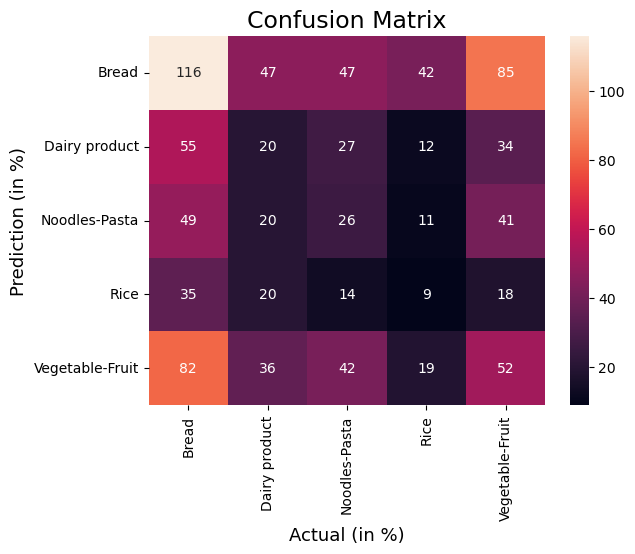

In [84]:
sns.heatmap(cm, 
			annot=True,
			fmt='g', 
			xticklabels=['Bread', 'Dairy product', 'Noodles-Pasta', 'Rice', 'Vegetable-Fruit'],
			yticklabels=['Bread', 'Dairy product', 'Noodles-Pasta', 'Rice', 'Vegetable-Fruit'])

plt.xlabel('Actual (in %)',fontsize=13)
plt.ylabel('Prediction (in %)',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

from this visualization of the confusion matrix we can conclude model highly misclassified between **Bread** as **Vegetable-Fruit** and **Vegetable-Fruit** as **Bread**.

Dataset/evaluation/Bread/5.jpg
The actual class is Bread The predicted calss is Vegetable-Fruit


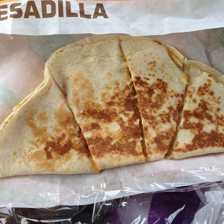

In [46]:
# Single picture test 
food_path = list(glob('Dataset/evaluation/Bread/5.jpg'))
print(food_path[0])
print(f"The actual class is Bread The predicted calss is Vegetable-Fruit")
PIL.Image.open(str(food_path[0])).resize((224, 224))